In [1]:
%matplotlib inline


# Reading and writing raw files


In this example, we read a raw file. Plot a segment of MEG data
restricted to MEG channels. And save these data in a new
raw file.



In [2]:
# Author: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#
# License: BSD (3-clause)

import mne
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()

fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

raw = mne.io.read_raw_fif(fname)

# Set up pick list: MEG + STI 014 - bad channels
want_meg = True
want_eeg = False
want_stim = False
include = ['STI 014']
raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bad channels + 2 more

picks = mne.pick_types(raw.info, meg=want_meg, eeg=want_eeg, stim=want_stim,
                       include=include, exclude='bads')

some_picks = picks[:5]  # take 5 first
start, stop = raw.time_as_index([0, 15])  # read the first 15s of data
data, times = raw[some_picks, start:(stop + 1)]

# save 150s of MEG data in FIF file
raw.save('sample_audvis_meg_raw.fif', tmin=0, tmax=150, picks=picks,
         overwrite=True)

Automatically created module for IPython interactive environment
Opening raw data file /home/arasdar/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Writing /home/arasdar/arasdar-DL-git/BCI-HW1/mne_examples/sample_audvis_meg_raw.fif
Closing /home/arasdar/arasdar-DL-git/BCI-HW1/mne_examples/sample_audvis_meg_raw.fif [done]


In [17]:
mne.io.read_raw_fif(fname)

Opening raw data file /home/arasdar/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.6 MB, data not loaded>

In [16]:
raw

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.6 MB, data not loaded>

Show MEG data



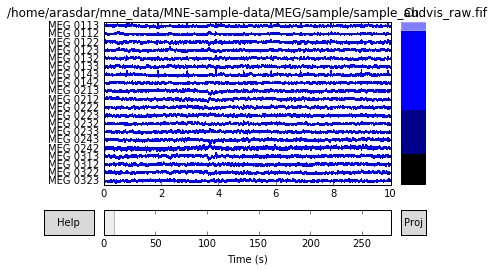

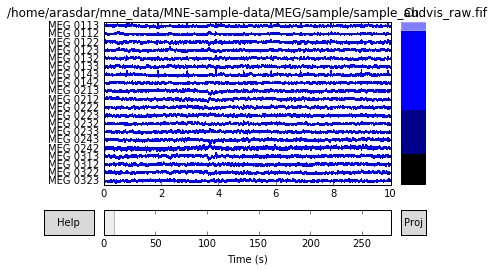

In [3]:
raw.plot()

In [4]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

In [6]:
raw.filenames

('/home/arasdar/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif',)

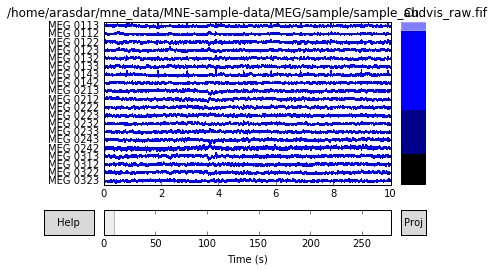

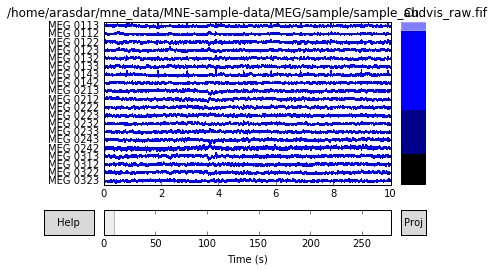

In [7]:
raw.plot()

In [9]:
raw.info

<Info | 24 non-empty fields
    acq_pars : 'str | 13886 items
    bads : 'list | MEG 2443, EEG 053, MEG 2443, EEG 053
    buffer_size_sec : 'numpy.float64 | 0.998976065792
    ch_names : 'list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : 'list | 376 items (EEG: 60, MAG: 102, EOG: 1, STIM: 9, GRAD: 204)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    description : 'str | 49 items
    dev_head_t : 'mne.transforms.Transform | 3 items
    dig : 'list | 146 items
    events : 'list | 1 items
    experimenter : 'str | 3 items
    file_id : 'dict | 4 items
    highpass : 'float | 0.10000000149011612 Hz
    hpi_meas : 'list | 1 items
    hpi_results : 'list | 1 items
    lowpass : 'float | 172.17630004882812 Hz
    meas_date : 'numpy.ndarray | 2002-12-03 14:01:10
    meas_id : 'dict | 4 items
    nchan : 'int | 376
    proj_id : 'numpy.ndarray | 1 items
    proj_name : 'str | 4 items
    projs : 'list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq

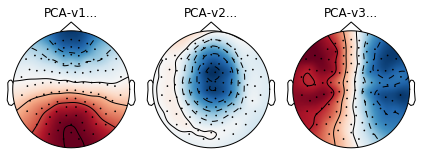

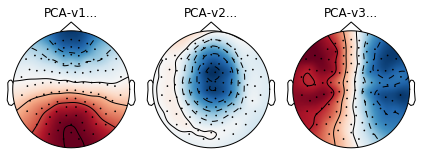

In [10]:
raw.plot_projs_topomap()

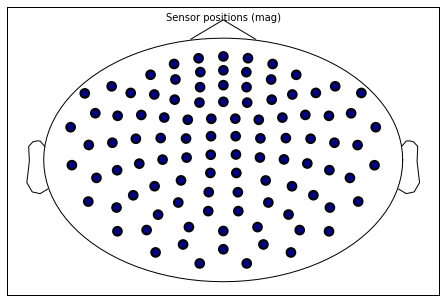

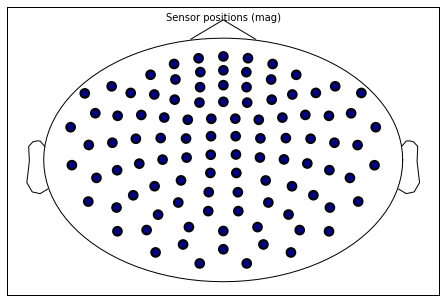

In [11]:
raw.plot_sensors()

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning


<ipython-input-12-904f350f08be>:1: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  raw.plot_psd()
/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/mne/viz/raw.py:614: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


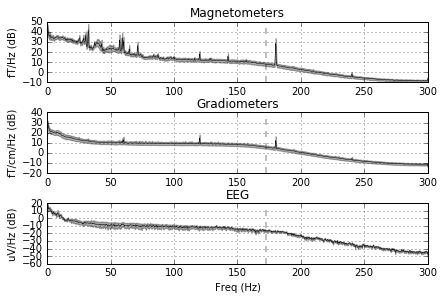

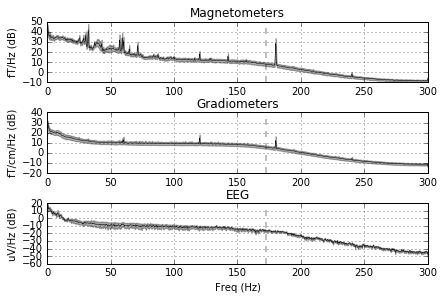

In [12]:
raw.plot_psd()

In [15]:
raw.times.shape

(166800,)